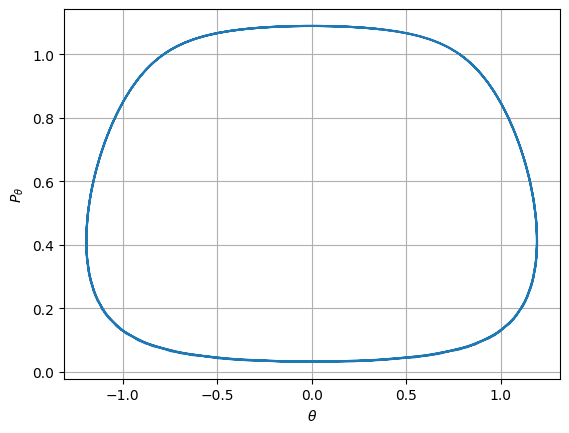

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import Paper_equations
import importlib

# import library with equations
importlib.reload(Paper_equations)

# Initial conditions
t0 = 0
initial_J = 2
initial_psi = 1
initial_P_J = -0.0272# initial_J*(1-(2*initial_psi)**(1/2))
initial_theta = 3.1415/4

y0 = np.array([initial_J, initial_psi, initial_J, initial_theta])
tf = 10  # Final time
h = 0.05  # Step size
m = 0.5  
q_0 = 1.1
q_wall = 3.5

# Solve the differential equations
t_values, y_values = Paper_equations.solve_runge_kutta4(Paper_equations.paper_differential_equations, t0, y0, tf, h, m, q_0)

P_J_values = y_values[:, 0]
psi_values = y_values[:, 1] 
J_values = y_values[:, 2]
theta_values = y_values[:, 3]


plt.plot(theta_values, psi_values)
plt.xlabel('$\\theta$')
plt.ylabel('$P_{\\theta}$')
plt.grid(True)
plt.show()

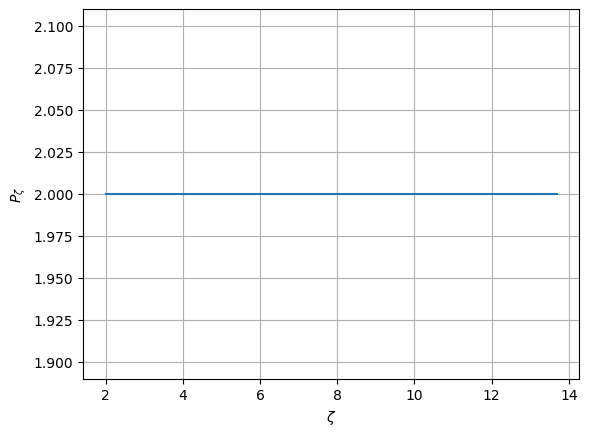

In [44]:
plt.plot(J_values, P_J_values)
plt.xlabel('$\\zeta$')
plt.ylabel('$P_{\\zeta}$')
plt.grid(True)
plt.show()

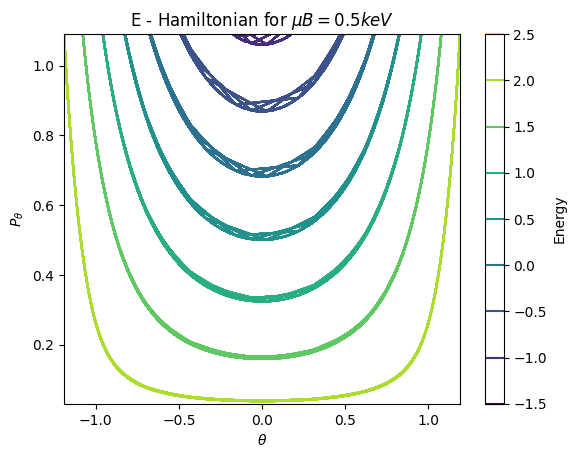

In [45]:
m_B = 0.5 # keV

# Generating mesh
theta, psi = np.meshgrid(theta_values, psi_values)
psi_p = psi/q_0*Paper_equations.calc_hyp2f1(psi.astype(np.float32), q_0, q_wall, 2).astype(np.float64)
Z = ((P_J_values + psi_p)**2*(1 - np.sqrt(2*psi)*np.cos(theta)))/2 + m_B

# Creating a contour plot
contour = plt.contour(theta, psi, Z)

# Adding colorbar
plt.colorbar(contour, label='Energy')

# Adding labels and title
plt.xlabel('$\\theta$')
plt.ylabel('$P_{\\theta}$')
plt.title('E - Hamiltonian for $\\mu B = 0.5 keV$')

# Displaying the plot
plt.show()